## Transcriptome annotation on GCP

### Introduction

The annotation of transcripts with functional and biological processes is an important step in developing an understanding of the biological complexity of an organism. Annotation is a complex process that requires the integration of multiple biological databases and several software tools.

A review of published manuscripts since 2012$^{1-9}$ reveals that many developed pipelines have a common core component which is the NCBI BLAST tool$^{10}$. This tool is used to align the assembled transcriptomes against annotated databases of nucleotides or proteins. These alignments are the first step, after an assembly, to identifying close and/or distant homologous genes, proteins, and functional domains that could be cross-referenced with other public databases, such as Gene Ontology$^{11}$, to generate a new annotation.

Our study is based on a workflow for [transcriptome annotation](https://github.com/ncbi/cwl-ngs-workflows-cbb/blob/master/workflows/Annotation/transcriptome_annotation.cwl). 

<img src="../doc/transcriptome_annotation.cwl.png" width="600" height="400"/>

This workflow is comprised of five steps that include the most important steps required for the transcriptome annotation. First, TransDecoder$^{12}$ is used to generate all open reading frames (ORFs) from the transcripts. Then, BLASTP and RPS-BLAST are used to generate a list of homologous proteins and conserved domains. BLASTP uses the BLAST nr database, and RPS-BLAST uses the NCBI Conserved Domain Database (CDD)$^{13}$. In parallel, BLASTN and RPST-BLASTN are executed, using the BLAST nt database and the NCBI CDD database, respectively. These steps generate a list of homologous genes and conserved domains. The workflow uses as input a FASTA file, named query, with multiple transcripts to process. The variation in the query size, i.e., number of transcripts in the file, is also studied.

We used the transcriptome assembled from a public BioProject with the ID [PRJNA320545](https://www.ncbi.nlm.nih.gov/bioproject/PRJNA320545) for the organism Opuntia streptacantha. The transcriptome includes 474,563 transcripts. From this pool of transcripts, three types of queries (FASTA files) were randomly generated, with 2,000, 6,000, and 10,000 transcripts in each. For each query size, 20 different files were generated and processed independently.

### Google Cloud Platform (GCP)

This notebook execute our workflow using the Google Cloud Life Sciences API. We explore different [machine types]( https://cloud.google.com/compute/docs/machine-types), first (N1) and second (N2) generation, and three number of CPUs for each machine type: 16, 32, and 64. We will call `configuration` to the combination of `MACHINE_TYPE/CPU`

The input data, transcriptome in FASTA file, is partitioned in the [01 - Data Partitioning.ipynb]( 01%20-%20Data%20Partitioning.ipynb). 20 FASTA files are created for each query size and are uploaded to a GCP storage bucket with prefixes: `nopal_2000_` for input data and `nopal_results_2000_` for the results files (2000 is for the query size processed and will be 2000, 6000 and 10000).

This notebook will create an organizational structure for storing the pipeline and logs files. It includes directories following the convention: `QUERY_SIZE/MACHINE_TYPE/CPU`. In addition, each `QUERY_SIZE` folder includes a `fasta` directory to store the FASTA files to be analyzed. See next directory tree for more information:

```bash
$ tree -dt ./results/PRJNA320545/
    ./results/PRJNA320545/
    ├── 10000
    │   ├── n1
    │   │   ├── 64
    │   │   ├── 32
    │   │   └── 16
    │   ├── n2
    │   │   ├── 64
    │   │   ├── 32
    │   │   └── 16
    │   └── fasta
    ├── 6000
    │   ├── n1
    │   │   ├── 64
    │   │   ├── 32
    │   │   └── 16
    │   ├── n2
    │   │   ├── 64
    │   │   ├── 32
    │   │   └── 16
    │   └── fasta
    └── 2000
        ├── n1
        │   ├── 64
        │   ├── 32
        │   └── 16
        ├── n2
        │   ├── 64
        │   ├── 32
        │   └── 16
        └── fasta

    30 directories
```

After completation, each configuration, `QUERY_SIZE/MACHINE_TYPE/CPU`, will include 22 files: 

* ` pipeline.json`: pipeline executed for that configuration.
* ` operations.tsv`: TSV file for relating FASTA file name with GCP operation ID and status
* `[1-20].json`: GCP pipeline log for each operation.

```bash
    └── 2000
        └── n1
            └── 16
                ├── 10.json
                ├── 11.json
                ├── 12.json
                ├── 13.json
                ├── 14.json
                ├── 15.json
                ├── 16.json
                ├── 17.json
                ├── 18.json
                ├── 19.json
                ├── 1.json
                ├── 20.json
                ├── 2.json
                ├── 3.json
                ├── 4.json
                ├── 5.json
                ├── 6.json
                ├── 7.json
                ├── 8.json
                ├── 9.json
                ├── operations.tsv
                └── pipeline.json
```

The annotation files, output from the CWL workflow will be stored in the result bucket with prefix: `nopal_results_2000_`, each QUERY_SIZE bucket will include directories with name: `SAMPLE_MACHINE_TYPE_CPUs`, e.g. `2000_1_n1_16`, FASTA file `2000_1` output for machine type `n1` with `16` CPUs. 

### Requirements

#### [Cloud SDK](https://cloud.google.com/sdk)

Install the Cloud SDK in your local computer:

Enter the following at a command prompt:

 `$ curl https://sdk.cloud.google.com | bash`
 
Restart your shell: 

 `$ exec -l $SHELL`
 
Run *gcloud init* to initialize the gcloud environment:

 `$ gcloud init`
    
### References

1.	Al-Qurainy, F. et al. Comprehensive Stress-Based De Novo Transcriptome Assembly and Annotation of Guar (Cyamopsis tetragonoloba (L.) Taub.): An Important Industrial and Forage Crop. Int J Genomics 2019, 7295859, doi:10.1155/2019/7295859 (2019).
2.	Chabikwa, T. G., Barbier, F. F., Tanurdzic, M. & Beveridge, C. A. De novo transcriptome assembly and annotation for gene discovery in avocado, macadamia and mango. Sci Data 7, 9, doi:10.1038/s41597-019-0350-9 (2020).
3.	Ji, P. et al. Characterization of common carp transcriptome: sequencing, de novo assembly, annotation and comparative genomics. PLoS One 7, e35152, doi:10.1371/journal.pone.0035152 (2012).
4.	Torre, S. et al. RNA-seq analysis of Quercus pubescens Leaves: de novo transcriptome assembly, annotation and functional markers development. PLoS One 9, e112487, doi:10.1371/journal.pone.0112487 (2014).
5.	Carruthers, M. et al. De novo transcriptome assembly, annotation and comparison of four ecological and evolutionary model salmonid fish species. BMC Genomics 19, 32, doi:10.1186/s12864-017-4379-x (2018).
6.	Haas, B. J. et al. De novo transcript sequence reconstruction from RNA-seq using the Trinity platform for reference generation and analysis. Nat Protoc 8, 1494-1512, doi:10.1038/nprot.2013.084 (2013).
7.	Bryant, D. M. et al. A Tissue-Mapped Axolotl De Novo Transcriptome Enables Identification of Limb Regeneration Factors. Cell Rep 18, 762-776, doi:10.1016/j.celrep.2016.12.063 (2017).
8.	Vera Alvarez, R. et al. Workflow and web application for annotating NCBI BioProject transcriptome data. Database (Oxford) 2017, doi:10.1093/database/bax008 (2017).
9.	Gamez, R. M. et al. Banana (Musa acuminata) transcriptome profiling in response to rhizobacteria: Bacillus amyloliquefaciens Bs006 and Pseudomonas fluorescens Ps006. BMC Genomics 20, 378, doi:10.1186/s12864-019-5763-5 (2019).
10.	Altschul, S. F., Gish, W., Miller, W., Myers, E. W. & Lipman, D. J. Basic local alignment search tool. J Mol Biol 215, 403-410, doi:10.1016/S0022-2836(05)80360-2 (1990).
11.	Ashburner, M. et al. Gene ontology: tool for the unification of biology. The Gene Ontology Consortium. Nat Genet 25, 25-29, doi:10.1038/75556 (2000).
12.	Haas, B. & Papanicolaou, A. TransDecoder (Find Coding Regions Within Transcripts), <https://github.com/TransDecoder/TransDecoder/wiki> (2020).
13.	Yang, M., Derbyshire, M. K., Yamashita, R. A. & Marchler-Bauer, A. NCBI's Conserved Domain Database and Tools for Protein Domain Analysis. Curr Protoc Bioinformatics 69, e90, doi:10.1002/cpbi.90 (2020).
  



### Loading packages from config/init.py

In [1]:
%run ../config/init.py

### Testing gcloud configuration

In [2]:
account = !gcloud config get-value account
account = ''.join(account)
project = !gcloud config get-value project
project = ''.join(project)
if account and project:
    print('Using account: {} with project: {}'.format(account, project))
else:
    print('Please, configure Cloud SDK before running this notebook')

Using account: veraalva@ncbi.nih.gov with project: cbb-research-dl


### Defining variables

Edit GCP zone and region variable accordingly to your geographical location.

In [3]:
ZONE = 'us-east1'
REGION = 'us-east1-c'

In [4]:
QUERY_SIZES = [2000, 6000, 10000]

MACHINE_TYPES = ['n1', 'n2']
CPUs = [16, 32, 64]

# Prices from 03/04/2020
PRICE = {
    'n1':{
        16: 0.861,
        32: 1.393,
        64: 2.475
    },
    'n2':{
        16: 0.951,
        32: 1.572,
        64: 2.816
    }    
}

PIPELINE_JSON = os.path.join(CONFIG, 'gcp', 'pipeline.json')
with open(PIPELINE_JSON) as fin:
    pipeline = json.load(fin)
    pipeline['resources']['zones'][0] = REGION

In [5]:
result_dir = os.path.join(RESULTS, DATASET)
if not os.path.exists(result_dir):
    os.mkdir(result_dir) 
os.chdir(result_dir)
print('Using as output directory: {}'.format(result_dir))

Using as output directory: /panfs/pan1.be-md.ncbi.nlm.nih.gov/alt_splicing/cloud-transcriptome-annotation/results/PRJNA320545


### Create or retrieve GCP storage bucket

In [6]:
bucket_list = !gsutil ls
buckets = {}
for q in QUERY_SIZES:
    prefix = 'gs://nopal_' + str(q) + '_'
    suffix = None
    for l in bucket_list:
        if prefix in l:
            suffix = l.replace('gs://nopal_' + str(q) + '_','').replace('/','')
            break
    if suffix:
        buckets[q] = suffix    

for q in QUERY_SIZES:
    if q not in buckets:
        suffix = str(uuid.uuid4())
        inbucket = 'nopal_' + str(q) + '_' + suffix
        outbucket = 'nopal_results_' + str(q) + '_' + suffix
        buckets[q] = suffix 
        
        !gsutil mb -l {ZONE} gs://{inbucket}
        !gsutil mb -l {ZONE} gs://{outbucket}
        !gsutil -m -o 'GSUtil:parallel_composite_upload_threshold=150M' -o 'GSUtil:parallel_process_count=16' -o 'GSUtil:parallel_thread_count=16' cp -R {q}/fasta/*.fa gs://{inbucket}/ 
        
for q in buckets:
    print('Query size: {0}\n\tin-bucket: nopal_{0}_{1}\n\tout-bucket: nopal_results{0}_{1}'.format(q, buckets[q]))

Query size: 2000
	in-bucket: nopal_2000_9649437f-0677-4573-b567-de6a2cb40c83
	out-bucket: nopal_results2000_9649437f-0677-4573-b567-de6a2cb40c83
Query size: 6000
	in-bucket: nopal_6000_21d1d4de-9db3-42ee-b6cb-d7e2bd667a20
	out-bucket: nopal_results6000_21d1d4de-9db3-42ee-b6cb-d7e2bd667a20
Query size: 10000
	in-bucket: nopal_10000_55581824-6fd2-4b02-9527-c43230a115a2
	out-bucket: nopal_results10000_55581824-6fd2-4b02-9527-c43230a115a2


### Submitting jobs
After running this cell you should go to the [Google Cloud Console](https://console.cloud.google.com/compute) to visualize all running instances.

In [7]:
operations = {}
for q in QUERY_SIZES:
    operations[q] = {}
    q_dir = os.path.join(result_dir, str(q))
    
    for m in MACHINE_TYPES:
        operations[q][m] = {}
        m_dir = os.path.join(q_dir, str(m))
    
        inbucket = 'nopal_' + str(q) + '_' + buckets[q]
        outbucket = 'nopal_results_' + str(q) + '_' + buckets[q]

        if not os.path.exists(m_dir):
            os.mkdir(m_dir)
        os.chdir(m_dir)        
        
        for c in CPUs:
            operations[q][m][c] = {}
            c_dir = os.path.join(m_dir, str(c))
            if not os.path.exists(c_dir):
                os.mkdir(c_dir)
            os.chdir(c_dir)

            if os.path.exists('operations.tsv'):
                operations[q][m][c] = {'logs':{}}
                operations[q][m][c]['operations'] = pandas.read_csv('operations.tsv', sep='\t')
            else:        
                pipeline['resources']['virtualMachine']['machineType'] = '{}-standard-{}'.format(m,c)
                with open('pipeline.json', 'w') as f:
                    f.write(json.dumps(pipeline, indent=2))  

                d = []
                for i in range(1,21):
                    sample = '{}_{}'.format(q, i)
                    a = !gcloud beta lifesciences pipelines run --pipeline-file=pipeline.json --env-vars=N={m},CPUs={c},INBUCKET={inbucket},OUTBUCKET={outbucket},SAMPLE={sample}
                    if len(a) == 1 and a[0].startswith('Running'):
                        a = a[0].replace('].','').split('/')[5]
                        d.append([i, a, 'running'])
                    else:
                        d.append([i, None, a])
                operations[q][m][c] = {'logs':{}}
                operations[q][m][c]['operations'] = pandas.DataFrame(d, columns=['sample', 'id', 'status'])
                operations[q][m][c]['operations'].to_csv('operations.tsv', sep='\t', index=None)
            os.chdir(c_dir)
    
        os.chdir(m_dir)
    

### GCP log retrival for plotting
This cell will download the GCP logs for completed operations (jobs) creating the `[1-20].json` files for each configuration. 

You should executed it multiple times until all operations are completed. 

In [8]:
for q in QUERY_SIZES:
    boxdata_total = []
    boxdata_blast = []
    boxdata_creation = []
    q_dir = os.path.join(result_dir, str(q))
    print('Query size: {}'.format(q))
    for m in MACHINE_TYPES:
        m_dir = os.path.join(q_dir, str(m))
        os.chdir(m_dir)
        for c in CPUs:
            if c in operations[q][m]:
                c_dir = os.path.join(m_dir, str(c))
                os.chdir(c_dir)
                df = operations[q][m][c]['operations'].dropna()
                data = []
                print('\tMachine type: {}-standard-{}'.format(m,c))
                for i, r in df.iterrows():
                    id = r['id']
                    if os.path.exists('{}.json.gz'.format(r['sample'])):
                        with gzip.GzipFile('{}.json.gz', 'r') as fin:  
                            operations[q][m][c]['logs'][r['sample']] = json.load(fin.read().decode('utf-8'))
                    else:
                        if r['sample'] not in operations[q][m][c]['logs']:
                            a = !gcloud beta lifesciences operations describe --format=json {id}
                            l = json.loads(''.join(a))
                            if 'done' in l:
                                operations[q][m][c]['logs'][r['sample']] = l
                                with gzip.GzipFile('{}.json.gz'.format(r['sample']), 'w') as fout:   # 4. gzip
                                    fout.write(json.dumps(l, indent=2).encode('utf-8'))  
                    if r['sample'] in operations[q][m][c]['logs']:
                        d = parse_gcp_json(operations[q][m][c]['logs'][r['sample']], r['sample'])
                        if d:
                            data.append(d)
                operations[q][m][c]['gcp'] = pandas.DataFrame(data, columns=['id', 'GCP', 'BlastDB', 'CWL'])
                platform = 'GCP\n{}\n{}'.format(m.upper(), c)
                for i, r in operations[q][m][c]['gcp'].iterrows():
                    boxdata_total.append([r['GCP']/pandas.Timedelta('1 minute'), platform])
                    boxdata_blast.append([r['BlastDB']/pandas.Timedelta('1 minute'), platform])
                    boxdata_creation.append([r['GCP']/pandas.Timedelta('1 minute') - (r['CWL']/pandas.Timedelta('1 minute') + r['BlastDB']/pandas.Timedelta('1 minute')), platform])
                os.chdir(c_dir)    
        os.chdir(m_dir)
    operations[q][m][c]['total'] = pandas.DataFrame(boxdata_total, columns=['Time', 'Platform'])
    operations[q][m][c]['blast'] = pandas.DataFrame(boxdata_blast, columns=['Time', 'Platform'])
    operations[q][m][c]['creation'] = pandas.DataFrame(boxdata_creation, columns=['Time', 'Platform'])

Query size: 2000
	Machine type: n1-standard-16
	Machine type: n1-standard-32
	Machine type: n1-standard-64
	Machine type: n2-standard-16
	Machine type: n2-standard-32
	Machine type: n2-standard-64
Query size: 6000
	Machine type: n1-standard-16
	Machine type: n1-standard-32
	Machine type: n1-standard-64
	Machine type: n2-standard-16
	Machine type: n2-standard-32
	Machine type: n2-standard-64
Query size: 10000
	Machine type: n1-standard-16
	Machine type: n1-standard-32
	Machine type: n1-standard-64
	Machine type: n2-standard-16
	Machine type: n2-standard-32
	Machine type: n2-standard-64


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


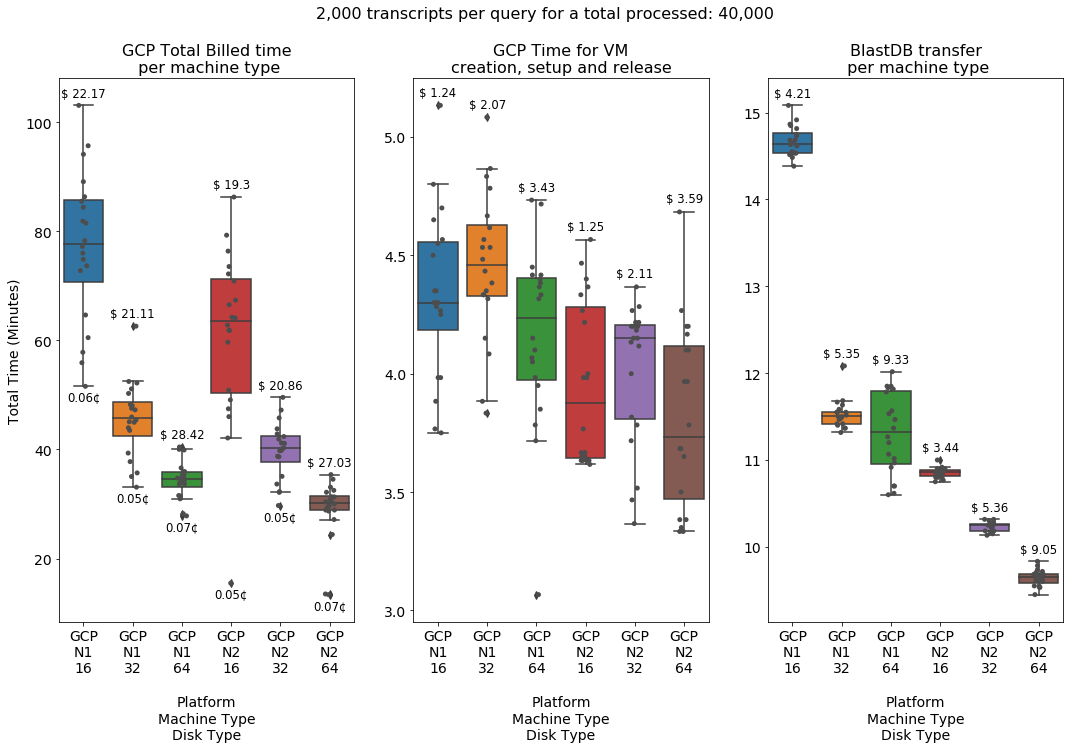

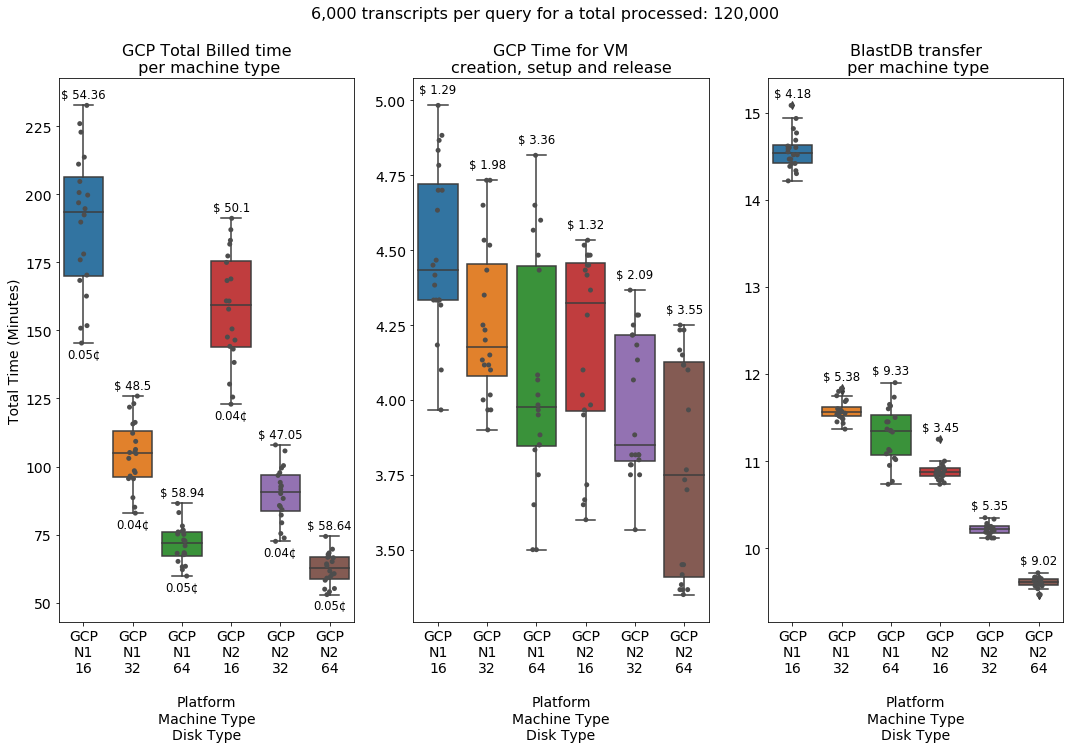

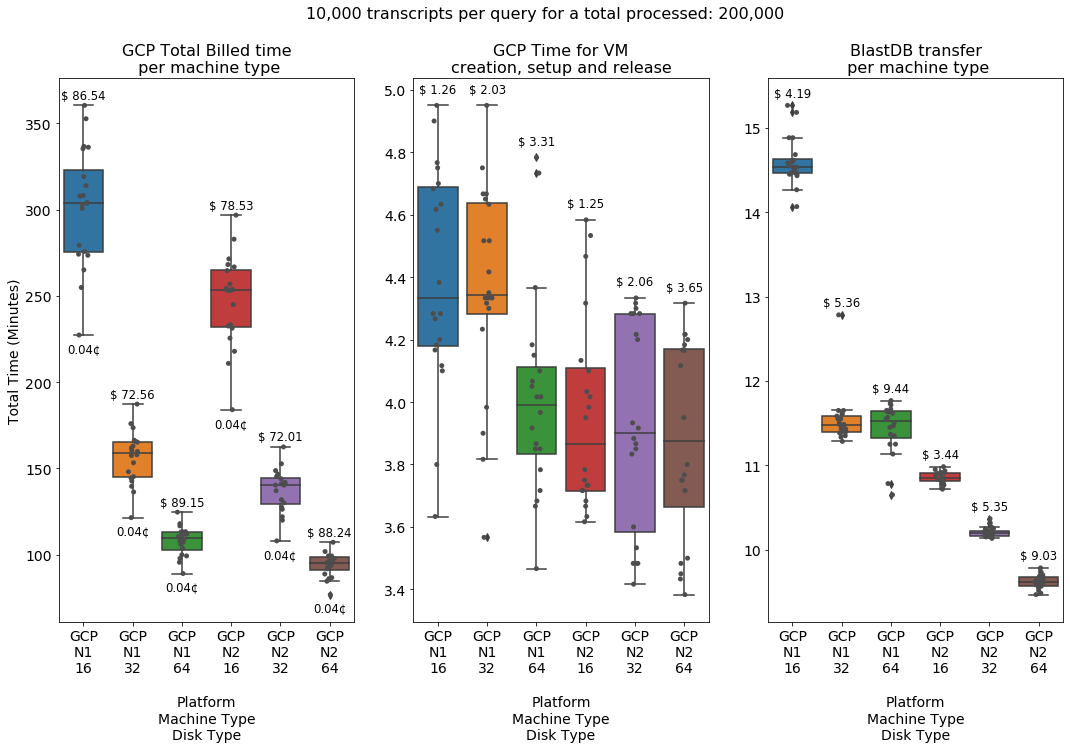

In [9]:
for q in QUERY_SIZES:
    df_total = operations[q][m][c]['total']
    df_blast = operations[q][m][c]['blast']
    df_creation = operations[q][m][c]['creation']

    fig, axs = plt.subplots(figsize=(18,10), ncols=3)

    fig.suptitle(locale.format_string("%d", int(q), grouping=True)
                         + ' transcripts per query for a total processed: ' 
                         + locale.format_string("%d", int(q) * 20, grouping=True)
                 + '\n\n', fontsize=16)

    j=0

    top = []
    low = []
    billed = []
    cost = []
    for p in df_total['Platform'].unique():
        f = p.lower().split('\n')
        top.append(df_total[df_total['Platform'] == p]['Time'].max())
        low.append(df_total[df_total['Platform'] == p]['Time'].min())
        billed.append('$ {}'.format(round(df_total[df_total['Platform'] == p]['Time'].sum()/60 * PRICE[f[1]][int(f[2])], 2)))
        cost.append('{:.2f}¢'.format(df_total[df_total['Platform'] == p]['Time'].sum()/60 * PRICE[f[1]][int(f[2])] * 100/(int(q) * 20)))


    box_plot = sns.boxplot(x="Platform", y="Time", data=df_total, ax=axs[j])
    
    top_tick = 1.6
    low_tick = 2.6
    if q == 6000:
        top_tick += 1.0
        low_tick += 2.4
    elif q == 10000:
        top_tick += 2.2
        low_tick += 7.2

    for xtick in box_plot.get_xticks():
        box_plot.text(xtick,top[xtick] + top_tick,billed[xtick], 
                horizontalalignment='center',size='small',weight='normal')

    for xtick in box_plot.get_xticks():
        box_plot.text(xtick,low[xtick] - low_tick,cost[xtick], 
                horizontalalignment='center',size='small',weight='normal')

    sns.stripplot(x="Platform", y="Time", data=df_total, jitter=True, color=".3", ax=axs[j])
    axs[j].set_ylabel("Total Time (Minutes)")
    axs[j].set_xlabel("\nPlatform\nMachine Type\nDisk Type")
    axs[j].set_title("GCP Total Billed time\n per machine type", fontsize=16)

    j = 1

    top = []
    billed = []
    for p in df_creation['Platform'].unique():
        f = p.lower().split('\n')
        top.append(df_creation[df_creation['Platform'] == p]['Time'].max())
        billed.append('$ {}'.format(round(df_creation[df_creation['Platform'] == p]['Time'].sum()/60 * PRICE[f[1]][int(f[2])], 2)))
        
    box_plot = sns.boxplot(x="Platform", y="Time", data=df_creation, ax=axs[j])

    for xtick in box_plot.get_xticks():
        box_plot.text(xtick,top[xtick] + 0.04,billed[xtick], 
                horizontalalignment='center',size='small',weight='normal')

    sns.stripplot(x="Platform", y="Time", data=df_creation, jitter=True, color=".3", ax=axs[j])
    axs[j].set_ylabel("")
    axs[j].set_xlabel("\nPlatform\nMachine Type\nDisk Type")
    axs[j].set_title("GCP Time for VM\ncreation, setup and release", fontsize=16)

    j = 2

    top = []
    billed = []
    for p in df_blast['Platform'].unique():
        f = p.lower().split('\n')
        top.append(df_blast[df_blast['Platform'] == p]['Time'].max())
        billed.append('$ {}'.format(round(df_blast[df_blast['Platform'] == p]['Time'].sum()/60 * PRICE[f[1]][int(f[2])], 2)))
        
    box_plot = sns.boxplot(x="Platform", y="Time", data=df_blast, ax=axs[j])

    for xtick in box_plot.get_xticks():
        box_plot.text(xtick,top[xtick] + 0.1,billed[xtick], 
                horizontalalignment='center',size='small',weight='normal')

    sns.stripplot(x="Platform", y="Time", data=df_blast, jitter=True, color=".3", ax=axs[j])
    axs[j].set_ylabel("")
    axs[j].set_xlabel("\nPlatform\nMachine Type\nDisk Type")
    axs[j].set_title("BlastDB transfer\n per machine type", fontsize=16)
